# MACHINE LEARNING PROJECT
## KC DATASET

### Library

In [6]:

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import pandas as pd
from os import *
from os.path import isfile, join
import sys
import scipy as scipy
import requests as rqs
import random
import time
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from matplotlib import gridspec
%matplotlib inline

# time series analysis
import statsmodels.api as sm
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from tbats import TBATS, BATS
import seaborn as sns
sns.set_theme(style="whitegrid")
from statsmodels.tsa.stattools import grangercausalitytests
from IPython.display import display

plt.rcParams["figure.figsize"] = (16,9)

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# keras models
from keras.layers import LSTM, Dense, GRU, CuDNNGRU, CuDNNLSTM, Activation, BatchNormalization, Dropout, LeakyReLU
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l1
from keras import backend as K
#from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint
from scipy.stats import norm


# visualizzazione
import seaborn as sns
sns.set_style('darkgrid', {"axes.facecolor": "0.94"})
sns.set_color_codes(palette='pastel')
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#extra
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [7]:
df = pd.read_csv('kc_house_data_corretto.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
#ORGANIZO DATA
#df["Date"]=df["Date"] +" "+ df["Hour"]
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#del df['Hour']
#df = df.rename(columns={'Date': 'DateHour'})
df.sort_values(by=['date'], inplace = True)
df.set_index( "date", inplace=True )
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-05-02,5561000190,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
2014-05-02,472000620,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2014-05-02,1024069009,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
2014-05-02,7853361370,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
2014-05-02,5056500260,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-14,1422700040,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
2015-05-14,8730000270,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
2015-05-15,7923600250,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650


In [9]:
# ### FILTRARE TRA DUE DATE ESATTE
# df['2019-04-01' : '2019-07-01']

# ### FILTRARE PER ANNO, MESE, ...
# df[df.index.year==2019]
# opzioni: year, month, day, hour, minute, dayofweek (lunedì è lo zero)

# ### GROUP BY PER GIORNO, MEDIANDO
# df.resample('D').mean()

#INIZIO 2 maggio 2014
# FINE  27 maggio 2015

### No missing values

In [10]:
#MISSING VALUES
print(df.isnull().sum())

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [11]:
#UN PO' DI STATISTICHE 
rows = []

for year in [2014,2015]:
    for c in ['price']:
        dfy = df[df.index.year==year][c]
        descr = dfy.describe()
        descr['range'] = descr['max'] - descr['min']
        descr.name += '_' + str(year)
        rows.append(descr)

descr_df = pd.DataFrame(rows)
descr_df = descr_df[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range']]
descr_df

,mean,std,min,25%,50%,75%,max,range
price_2014,539181.428415,369162.693855,78000.0,320000.0,450000.0,645000.0,7700000.0,7622000.0
price_2015,541988.992264,362841.814006,75000.0,324950.0,450500.0,643237.5,5350000.0,5275000.0


In [12]:
#ANALISI MENSILI
#per guardare media di un determinato mese
df14= df[df.index.year==2014]
df15= df[df.index.year==2015]

media_14=[]
media_15=[]
cont=1
while cont<=12:
    media_14.append(np.mean(df14["price"][df14.index.month==cont]))
    media_15.append(np.mean(df15["price"][df15.index.month==cont]))
    cont=cont+1

dataf14_price = pd.DataFrame(media_14,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media price 14"])  
dataf15_price = pd.DataFrame(media_15,index=['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre','Dicembre'],columns=["media price 15"])  
#dataf["media_u6"]=media_u6
dataf14_price=dataf14_price.sort_values(by='media price 14', ascending=False)
dataf15_price=dataf15_price.sort_values(by='media price 15', ascending=False)
display(dataf14_price,dataf15_price)
#print(dataf14_price)
#print(dataf15_price)



#y2=np.mean(df1["consumo_attiva_u6"][df1.index.month])
#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.show()

,media price 14
Giugno,558002.199541
Maggio,548080.276584
Luglio,544788.764360
Ottobre,539026.971778
Agosto,536445.276804
Settembre,529253.821871
Dicembre,524461.866757
Novembre,521961.009213
Gennaio,NaN
Febbraio,NaN


,media price 15
Aprile,561837.774989
Maggio,558126.811146
Marzo,543977.187200
Gennaio,525870.889571
Febbraio,507851.371200
Giugno,NaN
Luglio,NaN
Agosto,NaN
Settembre,NaN
Ottobre,NaN


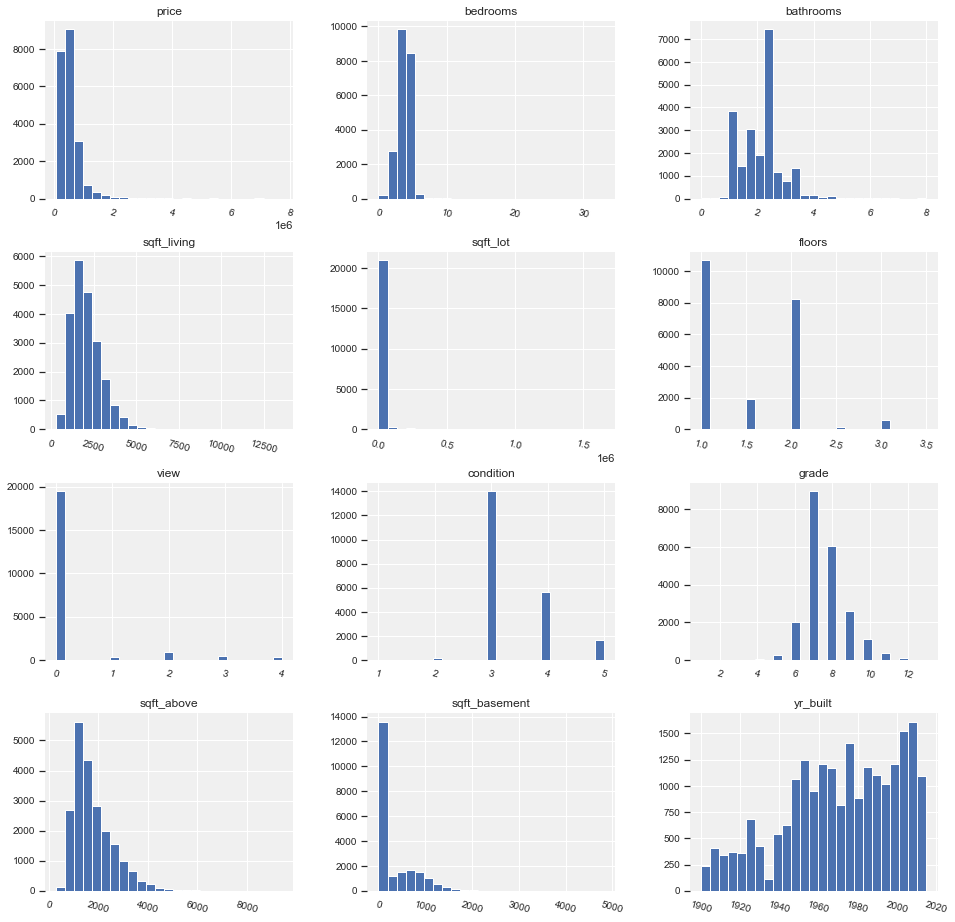

In [13]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

### Exploration

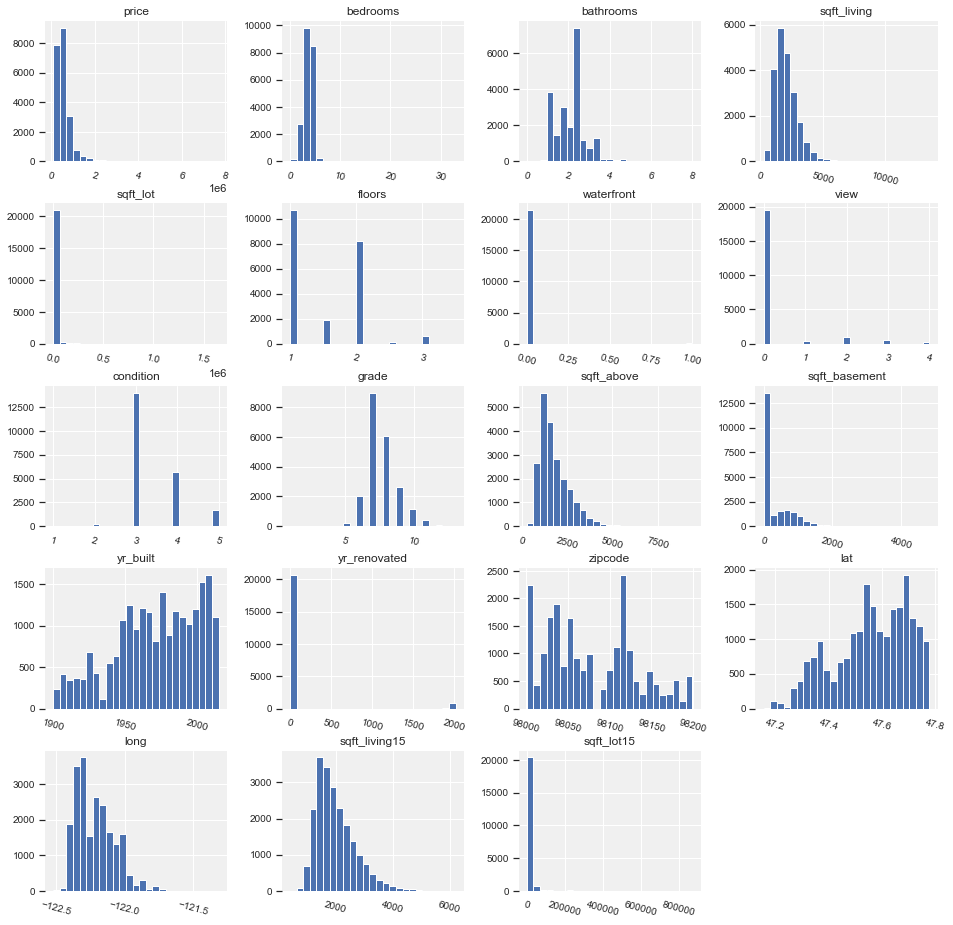

In [14]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

valori price totali: 



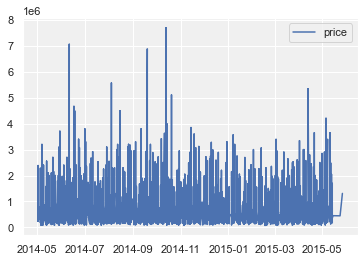

valori sqft_lot esterno: 



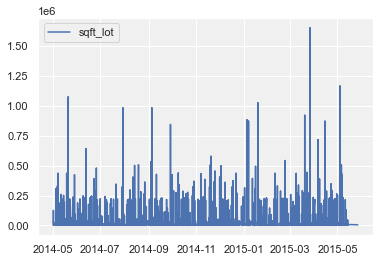

In [15]:
print("valori price totali: \n")
plt.plot(df['price'],label="price")
plt.legend()
plt.show()

print("valori sqft_lot esterno: \n")
plt.plot(df['sqft_lot'],label="sqft_lot")
plt.legend()
plt.show()


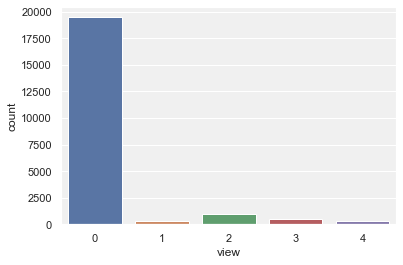

In [16]:
#si può notare che ci sono molte più case senza una view che negli altri casi
sns.countplot(x='view',data=df)

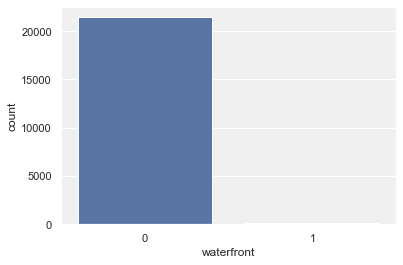

In [17]:
#molte poche waterfront houses
sns.countplot(x='waterfront',data=df)

In [21]:
#più alto è il grade e più alto è il prezzo ovviamente. Si nota inoltre che i prezzi non variano molto fra 2 e 6 a causa forse di una forte similarità delle case

#sns.lineplot(x='grade',y='price',data=df,palette='terrain')

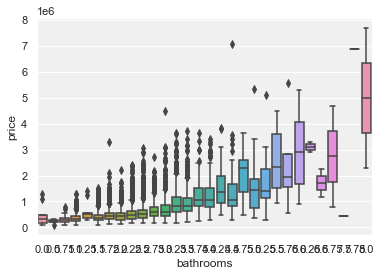

In [19]:
#controllo ora la relazione fra in numero di bagni e il prezzo

sns.boxplot(x='bathrooms',y='price',data=df)

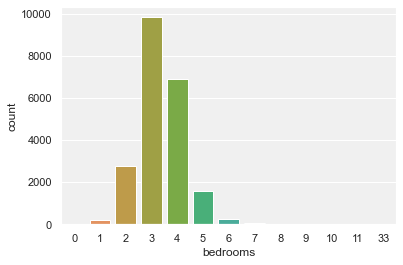

In [22]:
#si nota che sono presenti molte più case con 3 o 4 camere da letto rispetto alle altre, il che ci fa capire che ci sono molti altri attributi che valorizzano la casa e non solo le view, i waterfront o i bathrooms
sns.countplot(x='bedrooms',data=df)

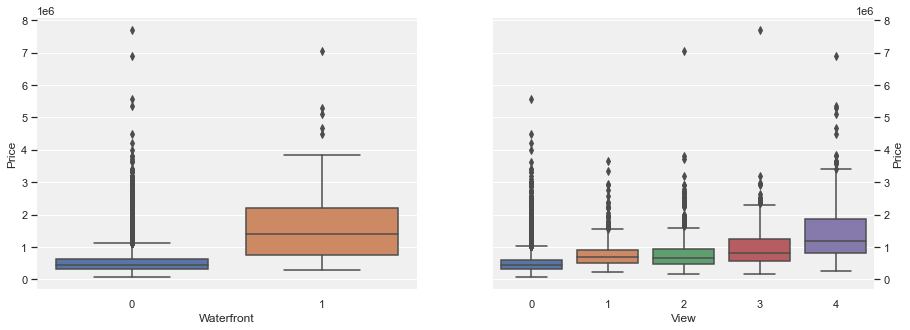

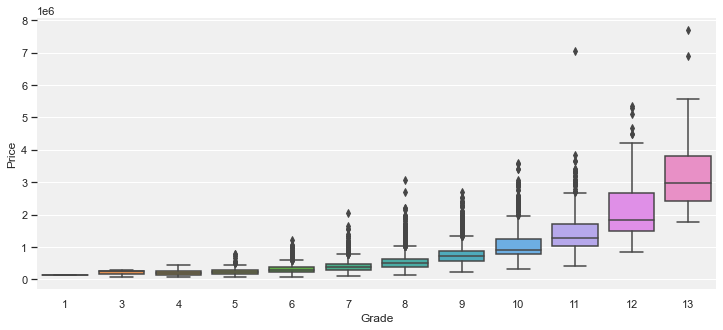

In [23]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

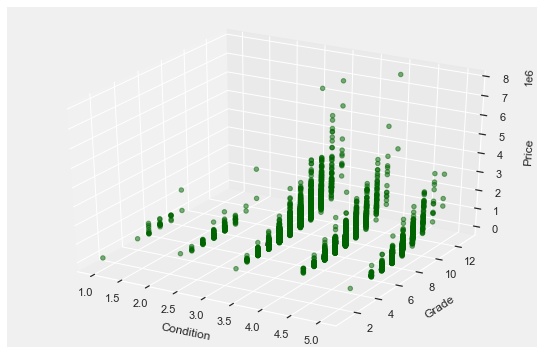

In [24]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(df['condition'],df['grade'],df['price'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nCondition',ylabel='\nGrade',zlabel='\nPrice');

[Text(0, 0.5, 'Price of the house'), Text(0.5, 0, 'Sqft Living Space')]

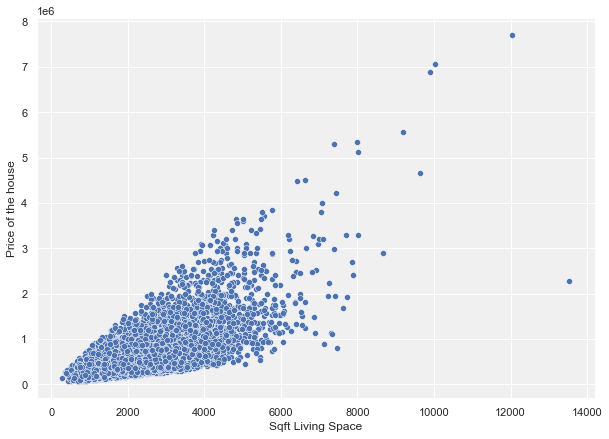

In [26]:
#analizzo ora Sqft Living 

plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living', y='price', data=df).set(xlabel='Sqft Living Space', ylabel='Price of the house')

#Sembra che questa variabile abbia una correlazione molto alta con il prezzo. In ogni caso ci sono anche degli outlier molto pesanti qui. Questi outlier potrebbero avere un cattivo effetto sull'accuratezza del nostro modello.
#outliers


<Figure size 1440x360 with 0 Axes>

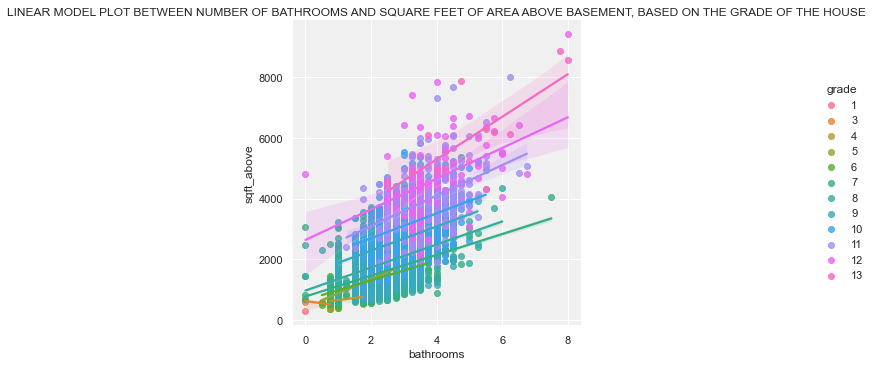

In [27]:
plt.figure(figsize=(20,5))
sns.lmplot(x='bathrooms',y='sqft_above',data=df,hue='grade')
plt.title("LINEAR MODEL PLOT BETWEEN NUMBER OF BATHROOMS AND SQUARE FEET OF AREA ABOVE BASEMENT, BASED ON THE GRADE OF THE HOUSE")
#plt.tight_layout()
plt.savefig("lm1")

Text(0.5, 1.0, 'BARPLOT OF CONDITION VERSUS PRICE')

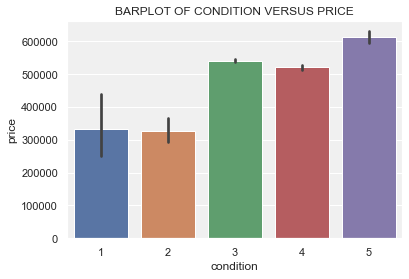

In [28]:
sns.barplot(x='condition',y='price',data=df)
plt.title("BARPLOT OF CONDITION VERSUS PRICE")

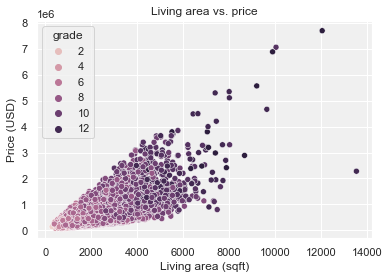

In [29]:
# Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = df['sqft_living'], y = df['price'], hue = df['grade'], data = df)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

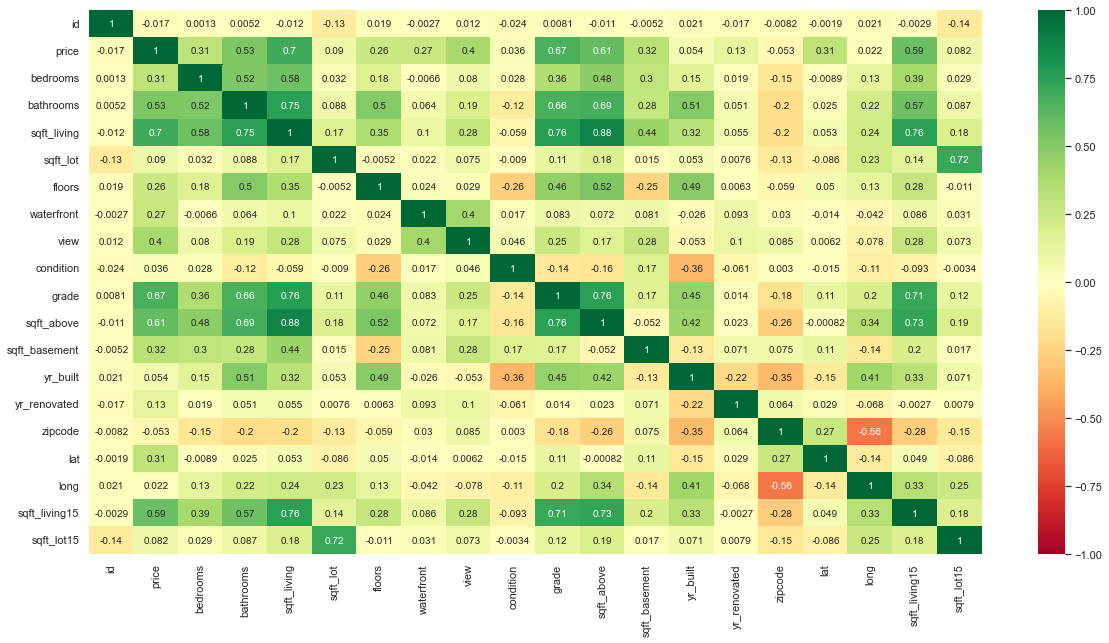

In [30]:
#controllo la correlazione che è presente fra la variabile prezzo e tutte le altre variabili
#all'interno della matrice di correlazione oltre a notare molte variabili correlate con il prezzo si notano molte variabili correlate fra di loro causando il problema della multicollinearità il quale se non sistemato andrà a ostacolare la predizione finale
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=+1, cmap='RdYlGn')

In [ ]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

In [ ]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
## using seaborn a count plot is plotted for the grade 
sns.countplot(df.grade,order=df['grade'].value_counts().index)

In [ ]:
#controllo nuovamente gli outlier per controllare se le features sono più normalizzate dopo la trasformazione logaritmica
def calc_interquartile(house2, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house2[column], 25), np.percentile(house2[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house2[house2[column] > upper]
    lower_outliers = house2[house2[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])




In [ ]:
#GUARDO OUTLIERS
#for i in df.columns:
    #print('Total outliers in ', i)
    #calc_interquartile(df, i)
    #print()

In [ ]:
#sostituire i valori 0 yr_renovated a yr_built per confronto
c=0
while c <21613:
    if df["yr_renovated"][c]==0:
        df["yr_renovated"][c]=df["yr_built"][c]
    c=c+1


In [ ]:
df["yr_renovated"]

In [ ]:
#creo una nuova colonna con differenza
df["restoration_time"]=df["yr_renovated"]-df["yr_built"]
df

In [ ]:
#save new df
#df.to_csv(r'kc_house_data_corretto_preprocessed1.csv')

### MAP

In [ ]:
print(df.lat.min(),"       :latitudine minima")
print(df.lat.max(),"       :latitudine massima")
print(df.long.min(),"       :longitudine minima")
print(df.long.max(),"       :longitudine massima")

BBox = (df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max())

In [ ]:
ruh_m = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (20,18))
ax.scatter(df.long, df.lat, zorder=1, alpha= 1, c='b',s=10)
ax.set_title('Plotting on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
df2=df.copy()
df2.sort_values(by=['zipcode'], inplace = True)
df2.set_index( "zipcode", inplace=True )

In [ ]:
df2=df2.groupby(['zipcode']).mean()
df2

In [ ]:
df2_split = np.array_split(df2, 7)
df2_split[5].groupby(['zipcode']).mean()

# run to view map

In [ ]:
#guardo per zipcode

# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]
minpr=df.loc[df['price'].idxmin()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
df_copy = df2_split[5].copy()
#df_copy = df[df['zipcode']==98019].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
folium.Marker([minpr['lat'], minpr['long']],popup='Lowest Price: $'+str(format(minpr['price'],'.0f')),
              icon=folium.Icon(color='red')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)

basemap.add_child(folium.LatLngPopup())

basemap


In [ ]:

#totale case
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]
minpr=df.loc[df['price'].idxmin()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98002].copy()
#df_copy = df[df['zipcode']==98019].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
folium.Marker([minpr['lat'], minpr['long']],popup='Lowest Price: $'+str(format(minpr['price'],'.0f')),
              icon=folium.Icon(color='red')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)

basemap.add_child(folium.LatLngPopup())

basemap

In [ ]:
#extra preprocessing

In [ ]:
house=df.copy()

In [ ]:
def df_characteristics(df):
    
    print('The shape of this dataframe is: {}'.format(df.shape), '\n')
    
    df_num = df.select_dtypes(include=[np.number])
    print('This dataframe has {} numeric features.'.format(df_num.shape[1]), '\n')
    print(df_num.columns, '\n')
    
    df_cat = df.select_dtypes(exclude=[np.number])
    print('This dataframe has {} categorical features.'.format(df_cat.shape[1]), '\n')
    print(df_cat.columns)

In [ ]:
df_characteristics(house)

In [ ]:
def remove_collinear_features(x, threshold):
    
    # Create correlation matrix:
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Work through the iterations setup:
    for i in iters:
        for j in range(i+1):
            items = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = items.columns
            row = items.index
            val = abs(items.values)
            
            # Compare against threshold:
            if val >= threshold:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
                
    cols_to_drop = set(drop_cols)
    x = x.drop(columns = cols_to_drop, axis=1)
    
    return x

In [ ]:
#tramite questa funzione possiamo vedere che la maggior parte degli attributi sono numerici anche se l'anno di costruzione e l'anno di ristrutturazione sono definiti tramite variabili numeriche invece che anno.
house.describe()

In [ ]:
#creo un dataset uguale ad house cosi da lavorare sempre sulla copia del dataset
house_copy = house.copy()

In [ ]:
#creo una colonna che mi dirà da quanti anni è stata ristrutturata la casa (perchè ovviamente più recentemente è stata ristrutturata e più alto sarà il suo valore)
house_copy['Yrs_since_renovated'] = np.where(house_copy['yr_renovated'] == 0, (2022 - house_copy['yr_built']), (2022 - house_copy['yr_renovated']))

In [ ]:
house_copy.dropna(inplace=True)

In [ ]:
#sistemo il problema della data
house_copy['date'] = house_copy['date'].apply(lambda x: dt.datetime.strptime(x, '%Y%m%dT%H%M%S'))
house_copy['Month'] = house_copy['date'].apply(lambda date: date.month)
house_copy['Year'] = house_copy['date'].apply(lambda date: date.year)

In [ ]:
#trasformo i float di bathrooms e floors in integers
house_copy['bathrooms'] = np.round(house_copy['bathrooms'])
house_copy['floors'] = np.round(house_copy['floors'])

In [ ]:
#controllo l'andamento del prezzo negli anni e sembra che anche se non in modo esponenziale tenda a salire
sns.lineplot(x='Year',y='price',data=house_copy)

In [ ]:
#creo una funzione che calcola il range interquantile
def calc_interquartile(house_copy, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house_copy[column], 25), np.percentile(house_copy[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house_copy[house_copy[column] > upper]
    lower_outliers = house_copy[house_copy[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])


In [ ]:
#applico la funzione precedente a tutte le colonne per trovare gli outlier in ogni feature
for i in house_copy.columns:
    print('Total outliers in ', i)
    calc_interquartile(house_copy, i)
    print()

In [ ]:
#creo una funzione per il calcolo degli zscore che sottrae la media da ogni punto e la divide per la deviazione standard e se il valore zscore di qualsiasi punto è minore di -3 o maggiore di 3, allora quel punto dati è un valore anomalo

def z_score(house_copy, column):
    #creo delle variabili globali per plottare il grafico 
    global zscore, outlier
     
    zscore = []
    outlier =[]
    
    threshold = 3
    
    mean = np.mean(house_copy[column])
    
    std = np.std(house_copy[column])
    for i in house_copy[column]:
        z = (i-mean)/std
        zscore.append(z)
        
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))


In [ ]:
#plotto gli outlier per la variabile feature 
z_score(house_copy, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()


In [ ]:
#applico ora la rimozione degli outlier tramite la zscore

dj=[]
for i in house_copy.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
house_copy['P'] = dj

house2= house_copy.drop(house_copy[house_copy['P'] == 0.0].index) 
house2.shape

In [ ]:
#sistemo la variabile year renovated perchè alcune case non sono state ristrutturate da quando sono state costruite per cui sostituisco il valore zero con l'anno di costruzione
house2['yr_renovated'] = house2[['yr_renovated', 'yr_built']].apply(lambda pair: pair[0] if pair[0] != 0 else pair[1], axis=1)

In [ ]:
# controllo le correlazioni
corr_features =[]

for i , r in house2.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features


In [ ]:
#correlazione del prezzo con le altre variabili
plt.figure(figsize=(10, 7))
house2.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices in King County')


In [ ]:
#vediamo come la ristrutturazione influenza i prezzi delle case

plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_renovated', y='price', data=house2[house2['yr_renovated'] != 0]).set(xlabel='Year of Renovation', ylabel='Price',
                                                                                        title='Relation between house price and year of renovation')

#da questi valori sembra che le case ristrutturate tendono ad avere un prezzo maggiore

In [ ]:
#controllo le correlazioni maggiori di 0.8 e le elimino
remove_collinear_features(house2, 0.8)

In [ ]:
#creo un dataframe in cui controllo le variabili che avevano la maggiore asimmetria positiva e di volta in volta controllo se è migliorato qualcosa
dataset_log = pd.DataFrame(columns=['Feature', 'Skew', 'Kurtosis'])
columns = ['lat', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view','grade','sqft_basement','sqft_living15','sqft_lot15']
for col in columns:
    dataset_log.loc[dataset_log.shape[0]] = [col, house2[col].skew(), house2[col].kurtosis()]
dataset_log

In [ ]:
#applico la trasformazione logaritmica a quelle variabili con code di outlier positive
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['lat'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['bedrooms'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['bathrooms'], color="g", fit=norm, ax=ax[2])

print("Asimmetria lat:",house2['lat'].skew())
print("Curtosi lat:",house2['lat'].kurtosis())

print("Asimmetria bed:",house2['bedrooms'].skew())
print("Curtosi bed:",house2['bedrooms'].kurtosis())

print("Asimmetria bathrooms:",house2['bathrooms'].skew())
print("Curtosi bathrooms:",house2['bathrooms'].kurtosis())


In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['sqft_living'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['sqft_lot'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['waterfront'], color="g", fit=norm, ax=ax[2])

print("Asimmetria:",house2['sqft_living'].skew())
print("Curtosi:",house2['sqft_living'].kurtosis())

print("Asimmetria:",house2['sqft_lot'].skew())
print("Curtosi:",house2['sqft_lot'].kurtosis())

print("Asimmetria:",house2['waterfront'].skew())
print("Curtosi:",house2['waterfront'].kurtosis())

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['view'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['grade'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['sqft_basement'], color="g", fit=norm, ax=ax[2])

print("Asimmetria:",house2['view'].skew())
print("Curtosi:",house2['view'].kurtosis())

print("Asimmetria:",house2['grade'].skew())
print("Curtosi:",house2['grade'].kurtosis())

print("Asimmetria:",house2['sqft_basement'].skew())
print("Curtosi:",house2['sqft_basement'].kurtosis())

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.distplot(house2['sqft_living15'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['sqft_lot15'], color="g", fit=norm, ax=ax[1])


print("Asimmetria:",house2['sqft_living15'].skew())
print("Curtosi:",house2['sqft_living15'].kurtosis())

print("Asimmetria:",house2['sqft_lot15'].skew())
print("Curtosi:",house2['sqft_lot15'].kurtosis())


In [ ]:
#per l'asimmetria 'skewness' da -0.5 a 0.5: curva abbastanza simmetrica. Da -1 a -0.5 o +0.5 a +1.0 moderata asimmetria. Oltre questo range: altamente asimmetrica
#per la curtosi invece Se > 3: alta curtosi, code lunghe, molti valori estremi possibilmente anomali. Se = 3: distribuzione normale. Se < 3: code corte, pochi valori estremi
#la maggior parte delle variabili presenta forte asimmetria e una curtosi molto alta per cui provo ad applicare la trasformazione logaritmica alle variabili per vedere se migliorano
#applico la trasformazione logaritmica
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(np.log1p(house2['lat']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['bedrooms']), fit=norm, ax=ax[1])
sns.distplot(np.log1p(house2['bathrooms']), fit=norm, ax=ax[2])

print("Asimmetria:",house2['lat'].skew())
print("Curtosi:",house2['lat'].kurtosis())

print("Asimmetria:",house2['bedrooms'].skew())
print("Curtosi:",house2['bedrooms'].kurtosis())

print("Asimmetria:",house2['bathrooms'].skew())
print("Curtosi:",house2['bathrooms'].kurtosis())

In [ ]:
dataset_log.loc[dataset_log['Skew'] > 1]

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(np.log1p(house2['view']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['grade']), fit=norm, ax=ax[1])
sns.distplot(np.log1p(house2['sqft_basement']), fit=norm, ax=ax[2])

print("Asimmetria:",house2['view'].skew())
print("Curtosi:",house2['view'].kurtosis())

print("Asimmetria:",house2['grade'].skew())
print("Curtosi:",house2['grade'].kurtosis())

print("Asimmetria:",house2['sqft_basement'].skew())
print("Curtosi:",house2['sqft_basement'].kurtosis())

In [ ]:
dataset_log.loc[dataset_log['Skew'] > 1]

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.distplot(np.log1p(house2['sqft_living15']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['sqft_lot15']), fit=norm, ax=ax[1])


print("Asimmetria:",house2['sqft_living15'].skew())
print("Curtosi:",house2['sqft_living15'].kurtosis())

print("Asimmetria:",house2['sqft_lot15'].skew())
print("Curtosi:",house2['sqft_lot15'].kurtosis())

In [ ]:
dataset_log.loc[dataset_log['Skew'] > 1]

In [ ]:
#controllo nuovamente gli outlier per controllare se le features sono più normalizzate dopo la trasformazione logaritmica
def calc_interquartile(house2, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house2[column], 25), np.percentile(house2[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house2[house2[column] > upper]
    lower_outliers = house2[house2[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])





In [ ]:
for i in house2.columns:
    print('Total outliers in ', i)
    calc_interquartile(house2, i)
    print()

In [ ]:
def z_score(house2, column):
    #creo delle variabili globali per plottare il grafico 
    global zscore, outlier
     
    zscore = []
    outlier =[]
    
    threshold = 3
    
    mean = np.mean(house2[column])
    
    std = np.std(house2[column])
    for i in house2[column]:
        z = (i-mean)/std
        zscore.append(z)
        
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

In [ ]:
z_score(house2, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()